# PHYS243 
# Homework #4
# ChiKit Ho ID# 862191050

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier

In [2]:
# Loading the dataset
from sklearn.datasets import fetch_openml
MNIST = fetch_openml('mnist_784', version=1, cache=True)
X = MNIST.data # Data with pixels values
y = MNIST.target # Array of labels

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
# Diving the data set into 70/30 training/testing set
# Random_state is set as 100 beause I don't want the training and testing set are different when running the code each time.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [6]:
X_train.shape, X_test.shape

((49000, 784), (21000, 784))

In [7]:
y_train.shape, y_test.shape

((49000,), (21000,))

In [8]:
#Check the label in y_train & y_test
np.unique(y_train),np.unique(y_test)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object))

Find all 9s. Since we need to find all 9s only we need to change the y target from 1-9s to binary class. (if 9 change to 1 else change to 0)

In [9]:
y_train_bi = np.where(y_train=='9', 1, 0)
y_test_bi = np.where(y_test=='9', 1, 0)

In [10]:
# Make sure y_train_bi and y_test_bi are ready
y_train_bi, y_test_bi

(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 1]))

In [11]:
#Check the label in y_train_bi & y_test_bi
np.unique(y_train_bi),np.unique(y_test_bi)

(array([0, 1]), array([0, 1]))

1. Find all 9s using Logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
lr.fit(X_train,y_train_bi)

C:\Users\Michael Ho\anaconda3\envs\PHYS247\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
#Check the classes
lr.classes_

array([0, 1])

In [15]:
y_pred=lr.predict(X_test)
print("The accuracy of the predictions on the test set is =", accuracy_score(y_test_bi, y_pred))

The accuracy of the predictions on the test set is = 0.9630952380952381


In [16]:
print(classification_report(y_test_bi,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18928
           1       0.82      0.80      0.81      2072

    accuracy                           0.96     21000
   macro avg       0.90      0.89      0.90     21000
weighted avg       0.96      0.96      0.96     21000



2. Find the 9s using K-Nearest neighbours for Minkowski metric of order (1, 2, 3).

In [17]:
from sklearn.neighbors import KNeighborsClassifier
#Since there are 10 labels, we set n_neighbors =10, metric = minkowski as requested and p=1 as requested.
knn=KNeighborsClassifier(n_neighbors=10,p=1,metric='minkowski')
knn.fit(X_train[:25000],y_train_bi[:25000])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=1,
                     weights='uniform')

In [18]:
#Check the classes of KNN
knn.classes_

array([0, 1])

In [19]:
y_pred_knn=knn.predict(X_test[:2500])
print("The accuracy of the predictions on the test set is =", accuracy_score(y_test_bi[:2500], y_pred_knn))

The accuracy of the predictions on the test set is = 0.9912


In [20]:
print(classification_report(y_test_bi[:2500],y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2244
           1       0.98      0.93      0.96       256

    accuracy                           0.99      2500
   macro avg       0.99      0.97      0.98      2500
weighted avg       0.99      0.99      0.99      2500



order p=2

In [21]:
#KNN2 with n_neighbors=10, p=2 and metric= minkowski
knn2=KNeighborsClassifier(n_neighbors=10,p=2,metric='minkowski')
knn2.fit(X_train[:25000],y_train_bi[:25000])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [22]:
#Check the classes of KNN2
knn.classes_

array([0, 1])

In [23]:
y_pred_knn2=knn2.predict(X_test[:2500])
print("The accuracy of the predictions on the test set is =", accuracy_score(y_test_bi[:2500], y_pred_knn2))

The accuracy of the predictions on the test set is = 0.9916


In [24]:
print(classification_report(y_test_bi[:2500],y_pred_knn2))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2244
           1       0.98      0.94      0.96       256

    accuracy                           0.99      2500
   macro avg       0.99      0.97      0.98      2500
weighted avg       0.99      0.99      0.99      2500



Order p=3. It takes longer time for the computation, so we use smaller training and testing set

In [25]:
#KNN3 with n_neighbors=10, p=3 and metric= minkowski
knn3=KNeighborsClassifier(n_neighbors=10,p=3,metric='minkowski')
knn3.fit(X_train[:10000],y_train_bi[:10000])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=3,
                     weights='uniform')

In [26]:
#Check the classes of KNN3
knn3.classes_

array([0, 1])

In [27]:
y_pred_knn3=knn3.predict(X_test[:1000])
print("The accuracy of the predictions on the test set is =", accuracy_score(y_test_bi[:1000], y_pred_knn3))

The accuracy of the predictions on the test set is = 0.989


In [28]:
print(classification_report(y_test_bi[:1000],y_pred_knn3))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       903
           1       0.96      0.93      0.94        97

    accuracy                           0.99      1000
   macro avg       0.97      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000



Conclusion: Minkowski order with p=2 has the best accuracy score with 0.986

3. Find the 9s using Support Vector Machines.

In [29]:
from sklearn import svm
#SVM model set Radial as kernel
svm_clf=svm.SVC(kernel="rbf")

In [30]:
svm_clf.fit(X_train[:10000], y_train_bi[:10000])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
y_pred_svm=svm_clf.predict(X_test[:1000])
print("The accuracy of the predictions on the test set is =", accuracy_score(y_test_bi[:1000], y_pred_svm))

The accuracy of the predictions on the test set is = 0.989


In [32]:
print(classification_report(y_test_bi[:1000],y_pred_svm))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       903
           1       0.99      0.90      0.94        97

    accuracy                           0.99      1000
   macro avg       0.99      0.95      0.97      1000
weighted avg       0.99      0.99      0.99      1000



Find the clusters in MNIST

In [33]:
from sklearn.cluster import KMeans
kmc=KMeans(n_clusters=10,random_state=100)

In [34]:
kmc.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [35]:
from sklearn.metrics import confusion_matrix
pred_labels=kmc.labels_
cm=confusion_matrix(y, pred_labels.astype(str))

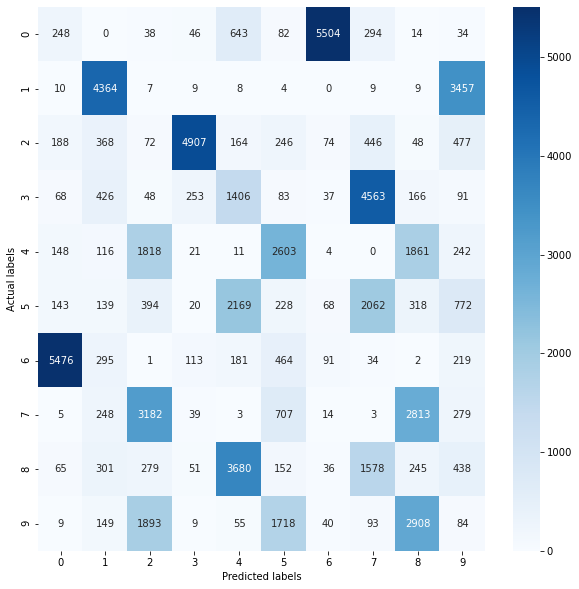

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,cmap='Blues',fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.show()

In [37]:
print(classification_report(y, pred_labels.astype(str)))

              precision    recall  f1-score   support

           0       0.04      0.04      0.04      6903
           1       0.68      0.55      0.61      7877
           2       0.01      0.01      0.01      6990
           3       0.05      0.04      0.04      7141
           4       0.00      0.00      0.00      6824
           5       0.04      0.04      0.04      6313
           6       0.02      0.01      0.01      6876
           7       0.00      0.00      0.00      7293
           8       0.03      0.04      0.03      6825
           9       0.01      0.01      0.01      6958

    accuracy                           0.08     70000
   macro avg       0.09      0.07      0.08     70000
weighted avg       0.10      0.08      0.09     70000



From the heatmap, Label '1' has the best result.

# Find every single digits

1. Find the digits using Logistic regression and one-vs-rest for multi-class option.

In [38]:
#One-vs-Rest method with Logistic Regression
model1=OneVsRestClassifier(LogisticRegression())

In [39]:
model1.fit(X_train[:10000], y_train[:10000])

C:\Users\Michael Ho\anaconda3\envs\PHYS247\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Michael Ho\anaconda3\envs\PHYS247\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [43]:
#Check the classes
model1.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [44]:
y_pred=model1.predict(X_test)
print("The accuracy of the predictions on the test set is =", accuracy_score(y_test, y_pred))

The accuracy of the predictions on the test set is = 0.8712857142857143


In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2035
           1       0.93      0.96      0.94      2379
           2       0.86      0.84      0.85      2104
           3       0.86      0.85      0.86      2193
           4       0.90      0.87      0.88      2104
           5       0.85      0.77      0.81      1860
           6       0.90      0.91      0.91      2094
           7       0.89      0.88      0.88      2155
           8       0.76      0.84      0.80      2004
           9       0.84      0.83      0.83      2072

    accuracy                           0.87     21000
   macro avg       0.87      0.87      0.87     21000
weighted avg       0.87      0.87      0.87     21000



2. Find the digits using K-Nearest neighbours for Minkowski metric of order (1, 2, 3).

In [46]:
# KNN with Minkowski order p=1
knn.fit(X_train[:25000],y_train[:25000])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=1,
                     weights='uniform')

In [47]:
#Check the classes of KNN
knn.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [48]:
y_pred_knn=knn.predict(X_test[:2500])
print("The accuracy of the predictions on the test set is =", accuracy_score(y_test[:2500], y_pred_knn))

The accuracy of the predictions on the test set is = 0.9596


In [49]:
print(classification_report(y_test[:2500],y_pred_knn))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       265
           1       0.90      1.00      0.95       274
           2       0.99      0.94      0.96       254
           3       0.95      0.97      0.96       246
           4       0.97      0.95      0.96       265
           5       0.95      0.97      0.96       205
           6       0.97      0.96      0.96       255
           7       0.96      0.96      0.96       261
           8       0.99      0.90      0.94       219
           9       0.96      0.95      0.96       256

    accuracy                           0.96      2500
   macro avg       0.96      0.96      0.96      2500
weighted avg       0.96      0.96      0.96      2500



In [50]:
# KNN with Minkowski order p=2
knn2.fit(X_train[:25000],y_train[:25000])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [51]:
#Check the classes of KNN
knn2.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [52]:
y_pred_knn2=knn2.predict(X_test[:2500])
print("The accuracy of the predictions on the test set is =", accuracy_score(y_test[:2500], y_pred_knn2))

The accuracy of the predictions on the test set is = 0.9676


In [53]:
print(classification_report(y_test[:2500],y_pred_knn2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       265
           1       0.94      1.00      0.97       274
           2       0.98      0.96      0.97       254
           3       0.96      0.96      0.96       246
           4       0.97      0.97      0.97       265
           5       0.95      0.98      0.97       205
           6       0.97      0.97      0.97       255
           7       0.97      0.97      0.97       261
           8       0.98      0.92      0.95       219
           9       0.97      0.95      0.96       256

    accuracy                           0.97      2500
   macro avg       0.97      0.97      0.97      2500
weighted avg       0.97      0.97      0.97      2500



In [54]:
# KNN with Minkowski order p=3
knn3.fit(X_train[:10000],y_train[:10000])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=3,
                     weights='uniform')

In [55]:
#Check the classes of KNN
knn3.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [56]:
y_pred_knn3=knn3.predict(X_test[:1000])
print("The accuracy of the predictions on the test set is =", accuracy_score(y_test[:1000], y_pred_knn3))

The accuracy of the predictions on the test set is = 0.966


In [57]:
print(classification_report(y_test[:1000],y_pred_knn3))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       105
           1       0.95      0.99      0.97       105
           2       0.99      0.96      0.98       106
           3       0.96      0.98      0.97       104
           4       1.00      0.97      0.99       105
           5       0.95      0.96      0.96        79
           6       0.97      0.93      0.95       102
           7       0.96      0.96      0.96       114
           8       0.97      0.94      0.96        83
           9       0.94      0.95      0.94        97

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



Conclusion: KNN for Minkowski metric of order 3 has the best accuracy score

3. Find the digits using Support Vector Machines and one-vs-rest for multi-class option.

In [58]:
##One-vs-Rest method with SVM
model2=OneVsRestClassifier(svm.SVC(kernel="rbf"))

In [59]:
#Training
model2.fit(X_train[:10000], y_train[:10000])

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [60]:
#Check the classes
model2.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [61]:
y_pred_svm=model2.predict(X_test[:1000])
print("The accuracy of the predictions on the test set is =", accuracy_score(y_test[:1000], y_pred_svm))

The accuracy of the predictions on the test set is = 0.964


In [62]:
print(classification_report(y_test[:1000],y_pred_svm))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       105
           1       0.98      0.97      0.98       105
           2       0.97      0.96      0.97       106
           3       0.94      0.97      0.96       104
           4       0.99      0.93      0.96       105
           5       0.97      0.95      0.96        79
           6       0.97      0.95      0.96       102
           7       0.97      0.98      0.97       114
           8       0.93      0.98      0.95        83
           9       0.96      0.96      0.96        97

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



In comparsion between the binary classifer vs multi-class classifer, although the accuracy score for the binary classifer is higher than the multi-class classifier, the recall score improve a lot when change from binary classifer to multi-class classsifier